In [21]:
import pickle
import pandas as pd
with open('dict_results_euclidian_max_norm.pkl', 'rb') as file:
    euclidian_max_norm = pickle.load(file)
    
with open('dict_results_city_block_cosine_chord.pkl', 'rb') as file:
    city_block_cosine_chord = pickle.load(file)
    
euclidian_max_norm_df = pd.DataFrame(euclidian_max_norm)
city_block_cosine_chord_df = pd.DataFrame(city_block_cosine_chord)

results_df = pd.concat([city_block_cosine_chord_df, euclidian_max_norm_df])

In [22]:
results_df

,metric,threshold,seed,val1,test1,val2,test2,val3,test3,val4,...,val7,test7,val8,test8,val9,test9,val10,test10,val11,test11
0,city_block,11.675777,1,0.250,0.250,0.470,0.465,0.790,0.750,0.850,...,0.880,0.900,0.885,0.890,0.880,0.890,0.875,0.890,0.890,0.900
1,city_block,11.675777,2,0.335,0.315,0.510,0.510,0.660,0.630,0.855,...,0.885,0.885,0.885,0.885,0.880,0.885,0.885,0.885,0.895,0.890
2,city_block,11.675777,3,0.270,0.260,0.405,0.380,0.790,0.750,0.850,...,0.870,0.900,0.880,0.885,0.890,0.900,0.880,0.900,0.855,0.900
3,city_block,11.675777,4,0.250,0.250,0.530,0.505,0.690,0.685,0.845,...,0.895,0.890,0.895,0.890,0.895,0.890,0.895,0.890,0.875,0.890
4,city_block,11.675777,5,0.250,0.250,0.510,0.510,0.640,0.655,0.845,...,0.875,0.900,0.885,0.895,0.900,0.905,0.900,0.905,0.885,0.905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,max_norm,0.177317,1,0.250,0.250,0.480,0.515,0.810,0.810,0.855,...,0.885,0.895,0.875,0.895,0.865,0.895,0.880,0.895,0.885,0.895
56,max_norm,0.177317,2,0.355,0.330,0.480,0.475,0.780,0.740,0.860,...,0.900,0.895,0.880,0.895,0.890,0.895,0.900,0.895,0.905,0.890
57,max_norm,0.177317,3,0.300,0.295,0.430,0.400,0.750,0.735,0.845,...,0.875,0.890,0.880,0.895,0.880,0.895,0.890,0.900,0.885,0.900
58,max_norm,0.177317,4,0.250,0.250,0.445,0.415,0.610,0.605,0.805,...,0.880,0.900,0.865,0.900,0.910,0.890,0.900,0.890,0.870,0.890


In [23]:
grouped_df = results_df.groupby(['metric', 'threshold']).mean().reset_index()


average_columns = [f'val{i+1}' for i in range(11)]+[f'test{i+1}' for i in range(11)]
grouped_df[average_columns] = grouped_df.groupby(['metric', 'threshold'])[average_columns].mean().reset_index()[average_columns]

grouped_df

,metric,threshold,seed,val1,test1,val2,test2,val3,test3,val4,...,val7,test7,val8,test8,val9,test9,val10,test10,val11,test11
0,chord,0.716062,3.0,0.272,0.269,0.486,0.471,0.731,0.711,0.843,...,0.890,0.898,0.888,0.900,0.892,0.897,0.894,0.895,0.895,0.895
1,chord,0.753749,3.0,0.276,0.268,0.486,0.472,0.767,0.743,0.845,...,0.885,0.897,0.890,0.899,0.890,0.902,0.892,0.895,0.891,0.898
2,chord,0.761178,3.0,0.275,0.270,0.493,0.476,0.739,0.732,0.848,...,0.888,0.893,0.897,0.904,0.893,0.901,0.889,0.901,0.890,0.899
3,chord,0.780408,3.0,0.281,0.275,0.547,0.545,0.744,0.732,0.854,...,0.885,0.896,0.895,0.901,0.901,0.905,0.892,0.906,0.889,0.906
4,chord,0.790786,3.0,0.281,0.279,0.582,0.576,0.755,0.739,0.844,...,0.877,0.897,0.895,0.897,0.897,0.897,0.898,0.905,0.893,0.905
5,chord,0.830326,3.0,0.283,0.280,0.622,0.590,0.790,0.740,0.849,...,0.886,0.889,0.893,0.888,0.891,0.888,0.903,0.899,0.893,0.899
6,city_block,11.675777,3.0,0.271,0.265,0.485,0.474,0.714,0.694,0.849,...,0.881,0.895,0.886,0.889,0.889,0.894,0.887,0.894,0.880,0.897
7,city_block,12.290292,3.0,0.274,0.273,0.464,0.463,0.724,0.704,0.844,...,0.889,0.897,0.888,0.899,0.894,0.900,0.898,0.902,0.889,0.906
8,city_block,12.471724,3.0,0.273,0.273,0.492,0.477,0.691,0.685,0.844,...,0.875,0.894,0.887,0.902,0.900,0.903,0.897,0.901,0.894,0.901
9,city_block,12.722575,3.0,0.273,0.275,0.544,0.529,0.762,0.735,0.837,...,0.880,0.893,0.897,0.898,0.905,0.897,0.905,0.899,0.895,0.899


test accuracy vs Threshold- metric = chord
   Threshold  Accuracy
0   0.716062     0.895
1   0.753749     0.898
2   0.761178     0.899
3   0.780408     0.906
4   0.790786     0.905
5   0.830326     0.899
test accuracy vs Threshold- metric = city_block
    Threshold  Accuracy
6   11.675777     0.897
7   12.290292     0.906
8   12.471724     0.901
9   12.722575     0.899
10  13.224153     0.903
11  13.885360     0.899
test accuracy vs Threshold- metric = cosine
    Threshold  Accuracy
12   0.650629     0.893
13   0.684872     0.897
14   0.692270     0.897
15   0.706675     0.893
16   0.712391     0.893
17   0.748010     0.874
test accuracy vs Threshold- metric = euclidian
    Threshold  Accuracy
18   0.716062     0.896
19   0.753749     0.903
20   0.761178     0.900
21   0.780408     0.895
22   0.790786     0.903
23   0.830326     0.895
test accuracy vs Threshold- metric = max_norm
    Threshold  Accuracy
24   0.154927     0.894
25   0.163081     0.898
26   0.165809     0.900
27   0.1667

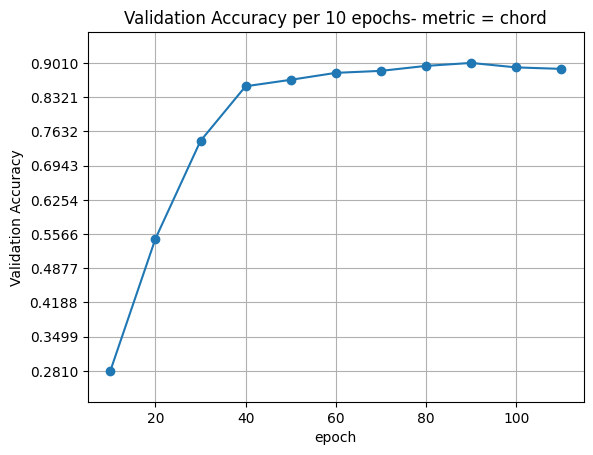

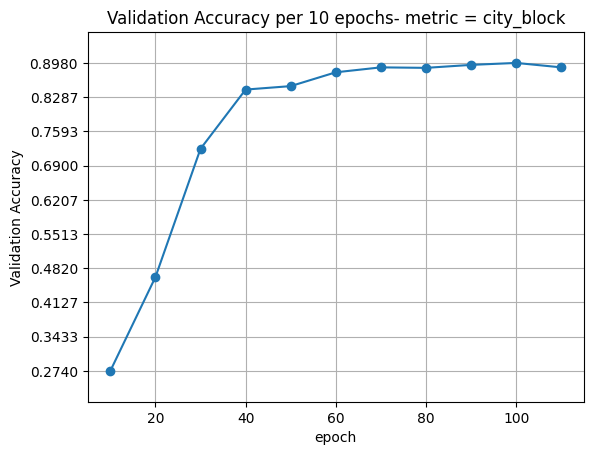

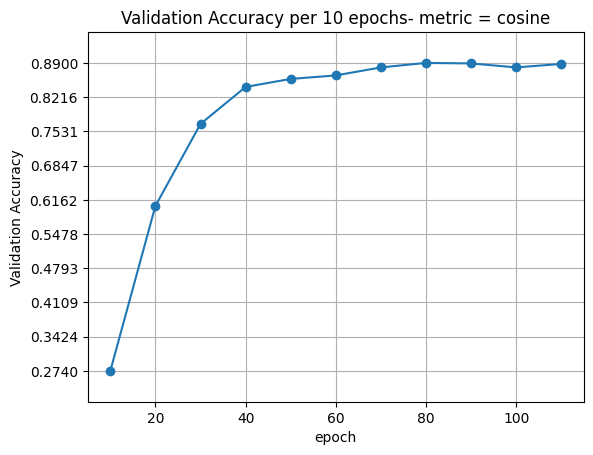

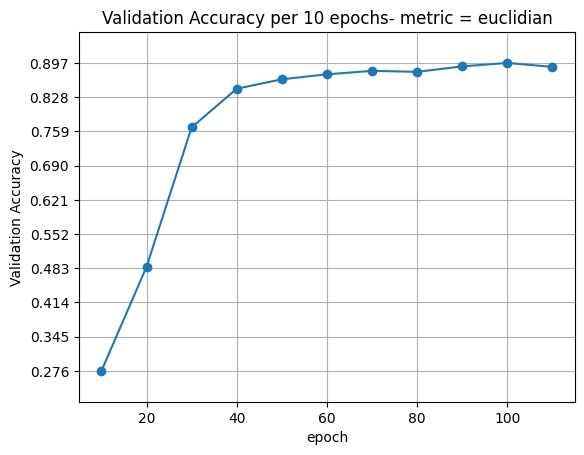

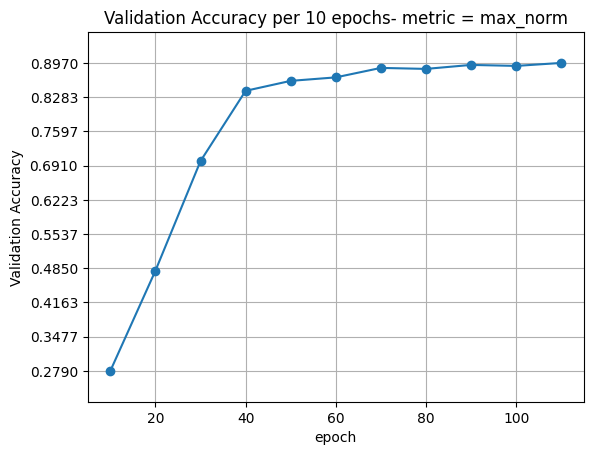

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Let's say you want to plot 'value1' as the y-axis
y_column = 'test11'

# Plot for each metric
for metric in grouped_df['metric'].unique():
    subset = grouped_df[grouped_df['metric'] == metric]
    # plt.plot(subset['threshold'], subset[y_column], marker='o', label=f'Metric {metric}')
    print(f'test accuracy vs Threshold- metric = {metric}')
    temp_dict = {'Threshold': subset['threshold'], 'Accuracy':subset[y_column]}
    print(pd.DataFrame(temp_dict))
    # plt.xlabel('Threshold')
    # plt.ylabel(y_column)
    # plt.title(f'test accuracy vs Threshold- metric = {metric}')
    # plt.grid(True)
    # y_min = min(subset[y_column])
    # y_max = max(subset[y_column])
    # y_range = y_max - y_min

    # # Adding extra space on the y-axis to make it symmetric
    # plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)
    

    # ticks = np.linspace(y_min, y_max, num=10)  # Adjust `num` for more or fewer ticks
    # plt.yticks(ticks)
    # plt.show()

for metric in grouped_df['metric'].unique():
    subset = grouped_df[grouped_df['metric'] == metric]
    max_test_acc = subset.loc[subset['test11'].idxmax()]
    y_values = max_test_acc[[f'val{i+1}' for i in range(11)]].values

    x_values = [(i+1)*10 for i in range(len(y_values))]
    plt.plot(x_values, y_values, marker='o')

    plt.xlabel('epoch')
    plt.ylabel('Validation Accuracy')
    plt.title(f'Validation Accuracy per 10 epochs- metric = {metric}')
    
    plt.grid(True)
    y_min = min(y_values)
    y_max = max(y_values)
    y_range = y_max - y_min
    plt.ylim(y_min - 0.1 * y_range, y_max + 0.1 * y_range)
    ticks = np.linspace(y_min, y_max, num=10)
    plt.yticks(ticks)
    
    plt.show()
